In [1]:
import pandas as pd
import sys
import os

utils_path = os.path.abspath('../dataset/Empty')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from utils import *

In [2]:
file_path = '../dataset/Empty/101_DT_1JU1512_20250703031424.csv'
origin_df = pd.read_csv(file_path, encoding = 'cp949')

In [3]:
# df : 전처리된 df
df = preprocess_df(origin_df)

In [4]:
df

,행정구역별(시군구),결합행정구역,주택의 종류별,항목,2022 년,2023 년
0,서울특별시,서울특별시,계,주택_계,100706,107681
1,서울특별시,서울특별시,계,(건축연도) 2023년,NaN,5931
2,서울특별시,서울특별시,계,(건축연도) 2022년,6865,2693
3,서울특별시,서울특별시,계,(건축연도) 2021년,3231,2278
4,서울특별시,서울특별시,계,(건축연도) 2020년,1665,1951
...,...,...,...,...,...,...
33709,서귀포시,제주특별자치도 서귀포시,비주거용 건물 내 주택,(건축연도) 2005~2009년,11,12
33710,서귀포시,제주특별자치도 서귀포시,비주거용 건물 내 주택,(건축연도) 2000~2004년,29,30
33711,서귀포시,제주특별자치도 서귀포시,비주거용 건물 내 주택,(건축연도) 1990~1999년,48,44
33712,서귀포시,제주특별자치도 서귀포시,비주거용 건물 내 주택,(건축연도) 1980~1989년,48,46


In [5]:
# 상위 레벨 행정구역의 미거주 주택수
sum_df = sum_upper_region(df)

In [6]:
sum_df

,행정구역별(시군구),결합행정구역,주택의 종류별,항목,2022 년,2023 년
0,서울특별시,서울특별시,계,주택_계,100706,107681
1,부산광역시,부산광역시,계,주택_계,110500,114245
2,대구광역시,대구광역시,계,주택_계,43086,56673
3,인천광역시,인천광역시,계,주택_계,72036,84414
4,광주광역시,광주광역시,계,주택_계,39205,40588
5,대전광역시,대전광역시,계,주택_계,26262,25396
6,울산광역시,울산광역시,계,주택_계,29569,30900
7,세종특별자치시,세종특별자치시,계,주택_계,12388,13019
8,경기도,경기도,계,주택_계,262266,286140
9,강원특별자치도,강원특별자치도,계,주택_계,80609,82552


In [9]:
fig = plot_empty_upper(sum_df, title ='상위행정구역별_빈집_수' ,save=True)
fig.show()

✅ 그래프가 HTML로 저장되었습니다: ./plot/상위행정구역별_빈집_수.html


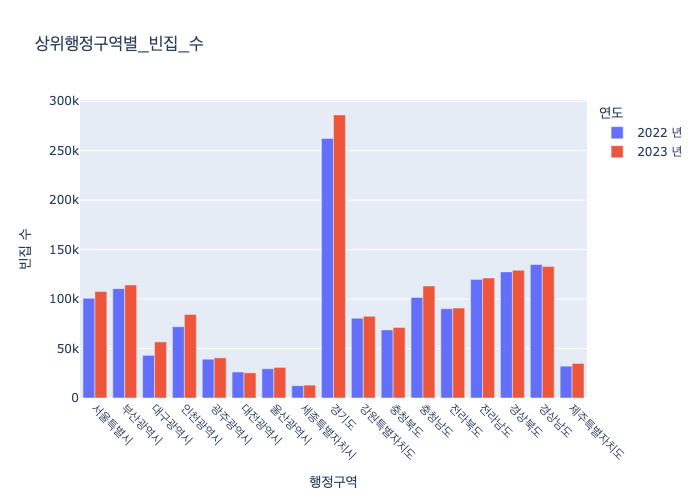

In [10]:
# png 출력용 - 깃에서 보기위함
pio.show(fig, renderer="png")